In [1]:
!unzip example_data_glasses.zip

Archive:  example_data_glasses.zip
   creating: example_data_glasses/
   creating: example_data_glasses/without_glasses/
  inflating: example_data_glasses/without_glasses/8.jpg  
  inflating: example_data_glasses/without_glasses/9.jpg  
  inflating: example_data_glasses/without_glasses/14.jpg  
  inflating: example_data_glasses/without_glasses/15.jpg  
  inflating: example_data_glasses/without_glasses/17.jpg  
  inflating: example_data_glasses/without_glasses/16.jpg  
  inflating: example_data_glasses/without_glasses/12.jpg  
  inflating: example_data_glasses/without_glasses/13.jpg  
  inflating: example_data_glasses/without_glasses/11.jpg  
  inflating: example_data_glasses/without_glasses/10.jpg  
  inflating: example_data_glasses/without_glasses/18.jpg  
  inflating: example_data_glasses/without_glasses/19.jpg  
   creating: __MACOSX/
   creating: __MACOSX/example_data_glasses/
   creating: __MACOSX/example_data_glasses/without_glasses/
  inflating: __MACOSX/example_data_glasses/wit

In [74]:
!pip install tqdm

    100% |################################| 51kB 25.2MB/s ta 0:00:01
You are using pip version 10.0.1, however version 18.1 is available.
You should consider upgrading via the 'pip install --upgrade pip' command.


In [1]:
from glob import glob
from skimage import io
import cv2
import keras
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten, Activation
from keras.layers import Conv2D, MaxPooling2D, GlobalAveragePooling2D
from keras import backend as K
from keras.utils import to_categorical
import numpy as np
from tqdm import tqdm_notebook

from albumentations import (
    HorizontalFlip, IAAPerspective, ShiftScaleRotate, CLAHE, RandomRotate90,
    Transpose, ShiftScaleRotate, Blur, OpticalDistortion, GridDistortion, HueSaturationValue,
    IAAAdditiveGaussianNoise, GaussNoise, MotionBlur, MedianBlur, IAAPiecewiseAffine,
    IAASharpen, IAAEmboss, RandomContrast, RandomBrightness, Flip, OneOf, Compose
)

from albumentations import (
    PadIfNeeded,
    HorizontalFlip,
    VerticalFlip,    
    CenterCrop,    
    Crop,
    Compose,
    Transpose,
    RandomRotate90,
    ElasticTransform,
    GridDistortion, 
    OpticalDistortion,
    RandomSizedCrop,
    OneOf,
    CLAHE,
    RandomContrast,
    RandomGamma,
    RandomBrightness
)

from albumentations import HorizontalFlip

import dlib

import matplotlib.pyplot as plt

Using TensorFlow backend.


In [ ]:
layers

In [6]:
!pip install dlib

    100% |################################| 3.3MB 14.3MB/s ta 0:00:01
  Running setup.py bdist_wheel for dlib ... done
  Stored in directory: /home/ubuntu/.cache/pip/wheels/ce/f9/bc/1c51cd0b40a2b5dfd46ab79a73832b41e7c3aa918a508154f0
Successfully built dlib
You are using pip version 10.0.1, however version 18.1 is available.
You should consider upgrading via the 'pip install --upgrade pip' command.


In [2]:
test_data_paths = glob("./example_data_glasses/*/*")
test_labels = list(map(lambda x: 0 if "without" in x else 1, test_data_paths))
test_data = list(map(cv2.imread, test_data_paths))

In [3]:
for img in test_data:
    print(img.shape)

(900, 602, 3)
(900, 743, 3)
(588, 471, 3)
(900, 567, 3)
(900, 716, 3)
(900, 597, 3)
(854, 784, 3)
(811, 900, 3)
(900, 872, 3)
(900, 707, 3)
(571, 480, 3)
(900, 539, 3)
(900, 846, 3)
(900, 507, 3)
(900, 762, 3)
(901, 566, 3)
(858, 900, 3)
(900, 507, 3)
(552, 552, 3)
(859, 731, 3)
(900, 659, 3)
(900, 711, 3)
(674, 900, 3)
(900, 737, 3)
(678, 900, 3)
(428, 456, 3)
(667, 667, 3)
(900, 548, 3)
(900, 663, 3)
(672, 672, 3)
(900, 701, 3)
(900, 900, 3)
(816, 720, 3)
(900, 635, 3)
(552, 552, 3)
(780, 720, 3)
(900, 697, 3)
(900, 731, 3)
(852, 720, 3)
(804, 720, 3)


In [428]:
!sudo apt-get install bunzip

Reading package lists... Done
Building dependency tree       
Reading state information... Done
E: Unable to locate package bunzip


In [438]:
!bzip2 -d dlib-models/dlib_face_recognition_resnet_model_v1.dat.bz2

In [4]:
dlib_detector = dlib.get_frontal_face_detector()
dlib_shape_predictor = dlib.shape_predictor("../shape_predictor_68_face_landmarks.dat")
dnnFaceDetector = dlib.cnn_face_detection_model_v1("./dlib-models/mmod_human_face_detector.dat")

In [441]:
dnnFaceDetector = dlib.cnn_face_detection_model_v1("./dlib-models/mmod_human_face_detector.dat")
faceRects = dnnFaceDetector(image, 0)
for faceRect in faceRects:
    x1 = faceRect.rect.left()
    y1 = faceRect.rect.top()
    x2 = faceRect.rect.right()
    y2 = faceRect.rect.bottom()

In [5]:
def get_rect(image):
    """
    image -- bgr image
    returns: np array with landmarks
    """
    rects = dlib_detector(image, 0)
    if len(rects) == 1:
        return rects[0]
    else:
        rects = dnnFaceDetector(image, 0)
        if len(rects) == 1:
            return rects[0].rect
        return []

In [6]:
def get_lm(image):
    """
    image -- bgr image
    returns: np array with landmarks
    """
    rects = dlib_detector(image, 0)
    if len(rects) == 1:
        rect = rects[0]
    else:
        return []
    shape = dlib_shape_predictor(test_data[0], rect)
    lm = shape.parts()
    lm = np.array([[p.x, p.y] for p in lm])
    return lm

In [ ]:
for i in range(len(test_data)):
    image = test_data[i]
    rect = get_rect(image)
    plt.imshow(cv2.cvtColor(image[rect.top():rect.bottom() - rect.height() // 2, rect.left():rect.right()], cv2.COLOR_BGR2RGB))
    plt.show()

In [399]:
lm[16]

array([399, 219])

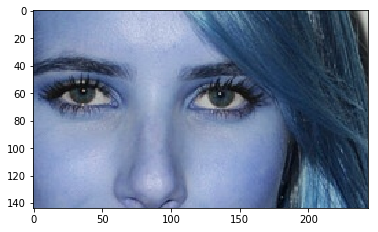

In [400]:
plt.imshow(image[2 * lm[27, 1] - lm[30, 1]:lm[30, 1], lm[0, 0]:lm[16, 0]])

In [7]:
def get_eyes_zone(image):
    rect = get_rect(image)
    if rect == []:
        return []
    h, w = image.shape[:2]
    top = np.max([0, rect.top()])
    bottom = np.min([h, rect.bottom() - rect.height() // 2])
    left = np.max([0, rect.left()])
    right = np.min([w, rect.right()])
    return image[top:bottom, left:right]
#     lm = get_lm(image)
#     if len(lm) == 0:
#         return []
#     if lm[0, 0] < lm[16, 0]:
#         left, right = lm[0, 0], lm[16, 0]
#     else:
#         left, right = lm[16, 0], lm[0, 0]
    
#     top = 2 * lm[27, 1] - lm[30, 1]
#     bottom = lm[30, 1]
#     return image[top:bottom, left:right]

In [489]:
!git clone https://github.com/cleardusk/MeGlass

fatal: destination path 'MeGlass' already exists and is not an empty directory.


In [8]:
meglass_meta = np.loadtxt("./MeGlass/meta.txt", dtype=np.object)

In [9]:
!rm -rf MeGlassEyeZone
!mkdir MeGlassEyeZone

In [10]:
eyezone_meta = {}

logs = []
for image_path, label in tqdm_notebook(meglass_meta):
    image = cv2.imread("./MeGlass_120x120/{}".format(image_path))
    eyezone_image = get_eyes_zone(image)
    if len(eyezone_image) == 0:
        print(1)
        logs.append(["./MeGlass_120x120/{}".format(image_path), "Face not found"])
    else:
        cv2.imwrite("./MeGlassEyeZone/{}".format(image_path), eyezone_image)
        eyezone_meta["./MeGlassEyeZone/{}".format(image_path)] = label

1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1



In [13]:
import os

In [14]:
!rm -rf TestImagesEyeZone
!mkdir TestImagesEyeZone
!mkdir TestImagesEyeZone/without_glasses
!mkdir TestImagesEyeZone/with_glasses

In [15]:
logs_test = []
eyezone_test_meta = {}
for image_path, label in tqdm_notebook(zip(test_data_paths, test_labels)):
    image = cv2.imread("{}".format(image_path))
    eyezone_image = get_eyes_zone(image)
    if len(eyezone_image) == 0:
        logs_test.append(["{}".format(image_path), "Face not found"])
    else:
        direct = "with_glasses" if label else "without_glasses" 
        cv2.imwrite("./TestImagesEyeZone/{}/{}".format(direct, os.path.basename(image_path)), eyezone_image)
        eyezone_test_meta["./TestImagesEyeZone/{}/{}".format(direct, os.path.basename(image_path))] = label

In [16]:
!ls TestImagesEyeZone/with_glasses/

0.jpg  10.jpg  12.jpg  14.jpg  16.jpg  18.jpg  2.jpg  4.jpg  6.jpg  8.jpg
1.jpg  11.jpg  13.jpg  15.jpg  17.jpg  19.jpg  3.jpg  5.jpg  7.jpg  9.jpg


In [461]:
logs_test

[]

In [109]:
!ls './MeGlass_120x120/10032527@N08_identity_4@2582182573_0.jpg'

./MeGlass_120x120/10032527@N08_identity_4@2582182573_0.jpg


In [ ]:
ls ./MeGlass_120x120/

In [17]:
images_path_with_glasses = []
images_path_without_glasses = []
for image_path, label in tqdm_notebook(eyezone_meta.items()):
    if label == '1':
        eyezone_meta[image_path] = int(label)
        images_path_with_glasses.append(image_path)
    else:
        eyezone_meta[image_path] = int(label)
        images_path_without_glasses.append(image_path)

In [18]:
import scipy.stats as sps

In [514]:
!ls ./MeGlassEyeZone/10700761@N08_identity_4@3580401865_0.jpg

./MeGlassEyeZone/10700761@N08_identity_4@3580401865_0.jpg


In [519]:
ws, hs = [], []
for image_path in tqdm_notebook(eyezone_meta.keys()):
    image = cv2.imread(image_path)
    if image is None:
        print(image_path)
    else:
        w, h = image.shape[:2]
        ws.append(w); hs.append(h)

In [520]:
np.max(ws), np.max(hs)

(62, 120)

In [521]:
np.unique(hs)

array([ 72,  75,  76,  79,  80,  83,  85,  86,  87,  90,  91,  94,  95,
        96, 100, 101, 103, 104, 108, 110, 113, 120])

(array([3.9200e+02, 5.6700e+02, 4.2848e+04, 0.0000e+00, 1.7060e+03,
        0.0000e+00, 1.6500e+03, 1.0000e+00, 1.3300e+02, 1.4200e+02]),
 array([36. , 38.6, 41.2, 43.8, 46.4, 49. , 51.6, 54.2, 56.8, 59.4, 62. ]),
 <a list of 10 Patch objects>)

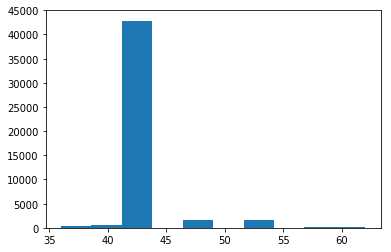

In [523]:
plt.hist(ws)

In [19]:
def make_square(image):
    w, h = image.shape[:2]
    if w > h:
        top, bottom = 0, 0
        left = (w - h) // 2
        right = (w - h) - left
    else:
        left, right = 0, 0
        top = (h - w) // 2
        bottom = (h - w) - top
    pad_image = cv2.copyMakeBorder(image, top, bottom, left, right, cv2.BORDER_CONSTANT, value=[0, 0, 0])
    return cv2.resize(pad_image, (82, 82))

In [20]:
def strong_aug(p=.5):
    return Compose([
        HorizontalFlip(),
        OneOf([
            IAAAdditiveGaussianNoise(),
            GaussNoise(),
        ], p=0.2),
        OneOf([
            MotionBlur(p=.2),
            MedianBlur(blur_limit=3, p=.1),
            Blur(blur_limit=3, p=.1),
        ], p=0.2),
        ShiftScaleRotate(shift_limit=0.0625, scale_limit=0.2, rotate_limit=45, p=.2),
        OneOf([
            OpticalDistortion(p=0.3),
            GridDistortion(p=.1),
            IAAPiecewiseAffine(p=0.3),
        ], p=0.2),
        OneOf([
            CLAHE(clip_limit=2),
            IAASharpen(),
            IAAEmboss(),
            RandomContrast(),
            RandomBrightness(),
        ], p=0.3),
        HueSaturationValue(p=0.3),
    ], p=p)

In [21]:
aug = strong_aug()

In [22]:
plt.imshow(aug(image=pad_image)["image"])

NameError: name 'pad_image' is not defined

In [23]:
images_path_with_glasses_test = glob("./TestImagesEyeZone/with_glasses/*")
images_path_without_glasses_test = glob("./TestImagesEyeZone/without_glasses/*")

# model

In [24]:
def get_batch_image_paths(batch_size):
    n_with_glasses = int(batch_size * np.random.uniform(low=0.2, high=0.5))
    n_without_glasses = batch_size - n_with_glasses
    batch_image_paths = list(
        np.random.choice(images_path_with_glasses, size=n_with_glasses)
    ) + list(
        np.random.choice(images_path_without_glasses, size=n_without_glasses)
    )
    np.random.shuffle(batch_image_paths)
    return batch_image_paths

In [25]:
def get_batch_image_paths_val(batch_size):
    batch_image_paths = list(
        images_path_with_glasses_test
    ) + list(
        images_path_without_glasses_test
    )
    return np.random.choice(batch_image_paths, size=batch_size)

In [26]:
def keras_generator(batch_size, is_train=True):
    while True:
        x_batch = []
        y_batch = []
        if is_train:
            batch_image_paths = get_batch_image_paths(batch_size)
        else:
            batch_image_paths = get_batch_image_paths_val(batch_size)
#             print(batch_image_paths)
        for image_path in batch_image_paths:
            img = cv2.imread(image_path)
            img = make_square(img)
            img = aug(image=img)["image"]
            
            if is_train:
                label = eyezone_meta[image_path]
            else:
                label = 0 if "without" in image_path else 1
            
            x_batch += [img]
            y_batch += [label]

        x_batch = np.array(x_batch) / 255.
        y_batch = np.array(y_batch)

        yield x_batch, to_categorical(y_batch, num_classes=2)

In [37]:
# mnist model

model = Sequential()
model.add(Conv2D(16, kernel_size=(3, 3),
                 activation='relu',
                 input_shape=[82, 82, 3]))
model.add(Conv2D(32, (3, 3), activation='relu'))
model.add(Conv2D(32, (3, 3), activation='relu'))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(Conv2D(128, (3, 3), activation='relu'))
model.add(Conv2D(128, (3, 3), activation='relu'))
model.add(GlobalAveragePooling2D())
model.add(Dense(64, activation='relu'))
model.add(Dense(2, activation='softmax'))
model.compile(loss=keras.losses.binary_crossentropy,
              optimizer=keras.optimizers.Adam(lr=0.0001, beta_1=0.9, beta_2=0.999, epsilon=1e-08, decay=0.0),
              metrics=['accuracy'])

In [38]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_22 (Conv2D)           (None, 80, 80, 16)        448       
_________________________________________________________________
conv2d_23 (Conv2D)           (None, 78, 78, 32)        4640      
_________________________________________________________________
conv2d_24 (Conv2D)           (None, 76, 76, 32)        9248      
_________________________________________________________________
conv2d_25 (Conv2D)           (None, 74, 74, 64)        18496     
_________________________________________________________________
conv2d_26 (Conv2D)           (None, 72, 72, 64)        36928     
_________________________________________________________________
conv2d_27 (Conv2D)           (None, 70, 70, 128)       73856     
_________________________________________________________________
conv2d_28 (Conv2D)           (None, 68, 68, 128)       147584    
__________

In [39]:
best_w = keras.callbacks.ModelCheckpoint('best_3.h5',
                                monitor='val_loss',
                                verbose=0,
                                save_best_only=True,
                                save_weights_only=False,
                                mode='auto',
                                period=1)

last_w = keras.callbacks.ModelCheckpoint('last_3.h5',
                                monitor='val_loss',
                                verbose=0,
                                save_best_only=False,
                                save_weights_only=False,
                                mode='auto',
                                period=1)


callbacks = [best_w, last_w]

In [42]:
batch_size = 512
model.fit_generator(keras_generator(batch_size),
              steps_per_epoch=int(45032 / batch_size),
              epochs=100,
              verbose=1,
              callbacks=callbacks,
              validation_data=keras_generator(batch_size, False),
              validation_steps=2,
              class_weight=None,
              max_queue_size=20,
              workers=1,
              use_multiprocessing=False,
              shuffle=True,
              initial_epoch=0)

In [580]:
model._make_predict_function()

In [587]:
for img in test_data:
    eye_zone_img = get_eyes_zone(img)
    to_nn = make_square(eye_zone_img)
    print(model.predict(np.array([to_nn])))

[[1. 0.]]
[[1. 0.]]
[[1. 0.]]
[[0. 1.]]
[[1. 0.]]
[[1. 0.]]
[[1. 0.]]
[[1. 0.]]
[[0. 1.]]
[[1. 0.]]
[[1. 0.]]
[[1. 0.]]
[[1. 0.]]
[[1. 0.]]
[[1. 0.]]
[[1. 0.]]
[[1. 0.]]
[[1. 0.]]
[[1. 0.]]
[[1. 0.]]
[[0. 1.]]
[[1. 0.]]
[[8.9127986e-38 1.0000000e+00]]
[[1.0906797e-12 1.0000000e+00]]
[[0. 1.]]
[[0. 1.]]
[[0. 1.]]
[[1. 0.]]
[[0. 1.]]
[[1. 0.]]
[[0. 1.]]
[[1. 0.]]
[[0. 1.]]
[[0. 1.]]
[[0. 1.]]
[[0. 1.]]
[[0. 1.]]
[[0. 1.]]
[[0. 1.]]
[[0. 1.]]
